# Examples of Common Distributions And How to Implement Them
By Yi-Lun (Alan) Chung $^\dagger$ and Carter Vu $^*$

$^\dagger$ National Tsing Hua University, Taiwan

$^*$ University of Washington, Seattle

Winter 2021

# Intro
In this set of examples, we will review 3 types of distributions: Gaussian/Normal distributions, Poisson distributions, and Binomial distributions. Check them out below!

https://en.wikipedia.org/wiki/Normal_distribution

https://en.wikipedia.org/wiki/Poisson_distribution

https://en.wikipedia.org/wiki/Binomial_distribution#:~:text=In%20probability%20theory%20and%20statistics,with%20probability%20p)%20or%20failure%20(

If you don't have some packages installed, see the README of this repository:



Each example has full explanations, so feel free to skip ahead!

# Gaussian Distribution

Probability mass function (PMF) for the Gaussian:

## $$g(x|\mu,\sigma) = \frac{1}{\sqrt{2\pi\,\sigma^2}}exp[-\frac{(x-\mu)^2}{2\,\sigma^2}]$$

Note that the PMF is the discrete counterpart of the continuous PDF! 

We start by using the NormalDist function from the statistics package. We create several NormalDist objects (read: functions), and plot 10,000 points on each distribution below. Each normaldist object should be the same as a Gaussian function for the given $\mu$ and $\sigma$ values.

## Import "statistics" package for an example

In [1]:
import matplotlib.pyplot as plt
from matplotlib.ticker import MaxNLocator
from matplotlib.colors import ListedColormap, LinearSegmentedColormap, BoundaryNorm
from matplotlib.collections import LineCollection
from matplotlib import cm

import numpy as np
import sys, os
import importlib
import time


from statistics import NormalDist

In [2]:
def Gaussian(x,mu,sigma):
    gaussian = 1./np.sqrt(2*np.pi*sigma**2)*np.exp(-(x-mu)**2/(2*sigma**2))
    return gaussian


gaussian_0_1 = NormalDist(mu=0, sigma=1)
gaussian_0_1_samples = gaussian_0_1.samples(10000)

gaussian_0_2 = NormalDist(mu=0, sigma=2)
gaussian_0_2_samples = gaussian_0_2.samples(10000)

gaussian_5_05 = NormalDist(mu=5, sigma=0.5)
gaussian_5_05_samples = gaussian_5_05.samples(10000)

gaussian_5_5 = NormalDist(mu=5, sigma=5)
gaussian_5_5_samples = gaussian_5_5.samples(10000)

# Put 10000 points for each parameter pair into a histogram

total data points for each case: 10000 


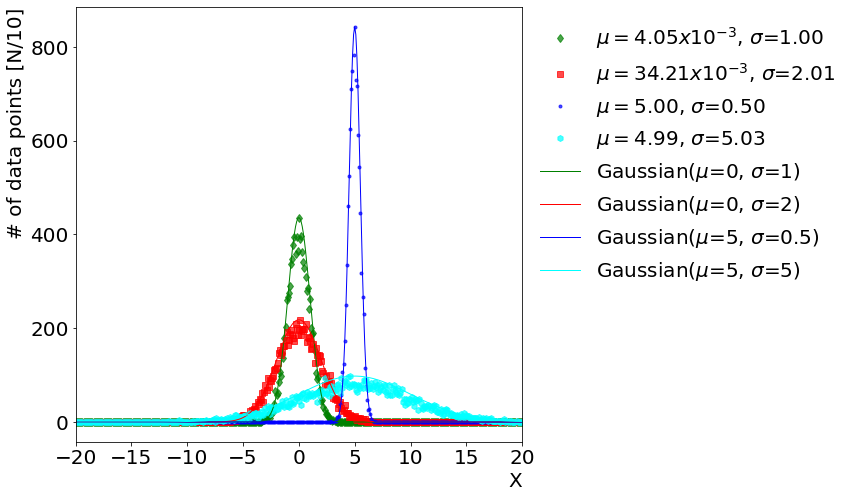

In [8]:
plt.figure(figsize=(8,8)) # plotsize

print("total data points for each case: {} ".format(len(gaussian_0_1_samples)))

mean_01 = np.mean(gaussian_0_1_samples)*1000
std_01 = np.std(gaussian_0_1_samples)

mean_02 = np.mean(gaussian_0_2_samples)*1000
std_02 = np.std(gaussian_0_2_samples)

mean_505 = np.mean(gaussian_5_05_samples)
std_505 = np.std(gaussian_5_05_samples)

mean_55 = np.mean(gaussian_5_5_samples)
std_55 = np.std(gaussian_5_5_samples)

bin_size = np.linspace(-40,40,801)

hist_0_1, bins_0_1 = np.histogram(gaussian_0_1_samples, bins=bin_size)
plt.step(bins_0_1[:-1], hist_0_1.astype(np.float32),"d" ,color = "green", where='mid',linewidth=3, alpha=0.7,label="$\mu={%.2f}x10^{%s}$, $\sigma$=%.2f" % (mean_01,"-3",std_01))
          
hist_0_2, bins_0_2 = np.histogram(gaussian_0_2_samples, bins=bin_size)
plt.step(bins_0_2[:-1], hist_0_2.astype(np.float32),"s" ,color = "red", where='mid',linewidth=3, alpha=0.7,label="$\mu={%.2f}x10^{%s}$, $\sigma$=%.2f" % (mean_02,"-3",std_02))

hist_5_05, bins_5_05 = np.histogram(gaussian_5_05_samples, bins=bin_size)
plt.step(bins_5_05[:-1], hist_5_05.astype(np.float32),".",color = "blue", where='mid',linewidth=3, alpha=0.7,label="$\mu={%.2f}$, $\sigma$=%.2f" % (mean_505,std_505))

hist_5_5, bins_5_5 = np.histogram(gaussian_5_5_samples, bins=bin_size)
plt.step(bins_5_5[:-1], hist_5_5.astype(np.float32),"h" ,color = "cyan", where='mid',linewidth=3, alpha=0.7,label="$\mu={%.2f}$, $\sigma$=%.2f" % (mean_55,std_55))

plt.plot(bin_size,Gaussian(bin_size,0,1)*np.max(hist_0_1)/Gaussian(0,0,1), color = "green", linestyle="-",linewidth=1, alpha=1,label="Gaussian($\mu$=0, $\sigma$=1)")
plt.plot(bin_size,Gaussian(bin_size,0,2)*np.max(hist_0_2)/Gaussian(0,0,2), color = "red", linestyle="-",linewidth=1, alpha=1,label="Gaussian($\mu$=0, $\sigma$=2)")
plt.plot(bin_size,Gaussian(bin_size,5,0.5)*np.max(hist_5_05)/Gaussian(5,5,0.5), color = "blue", linestyle="-",linewidth=1, alpha=1,label="Gaussian($\mu$=5, $\sigma$=0.5)")
plt.plot(bin_size,Gaussian(bin_size,5,5)*np.max(hist_5_5)/Gaussian(5,5,5), color = "cyan", linestyle="-",linewidth=1, alpha=1,label="Gaussian($\mu$=5, $\sigma$=5)")




# plt.text(-4, 450 , "$\mu=<X>$", fontsize=20)



# plt.legend(loc="best",ncol=1,fontsize=20,frameon=False)# plot label tag
plt.legend(bbox_to_anchor=(1, 0, 0, 1),ncol=1,fontsize=20,frameon=False)# plot label tag
# plt.yscale('log') 
# plt.xscale('log') 
plt.xlabel("X" , fontsize=20, horizontalalignment='right',x=1)  # plot x-axis label
plt.ylabel("# of data points [N/10]", fontsize=20, horizontalalignment='right',y=1)  # plot y-axis label
plt.xticks(fontsize=20)   # set x-ticks size
plt.yticks(fontsize=20)   # set y-ticks size 
plt.xlim((-20,20))
# plt.ylim((0,600))
# plt.savefig("./gaussian_0_1.pdf")  #save figure as pdf
plt.show()

# Normalized to One

total data points for each case: 10000 


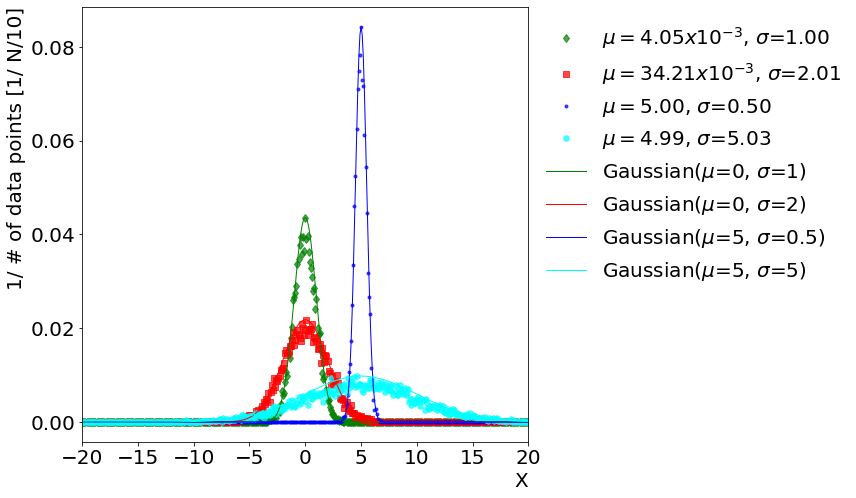

In [10]:
plt.figure(figsize=(8,8)) # plotsize

print("total data points for each case: {} ".format(len(gaussian_0_1_samples)))

mean_01 = np.mean(gaussian_0_1_samples)*1000
std_01 = np.std(gaussian_0_1_samples)

mean_02 = np.mean(gaussian_0_2_samples)*1000
std_02 = np.std(gaussian_0_2_samples)

mean_505 = np.mean(gaussian_5_05_samples)
std_505 = np.std(gaussian_5_05_samples)

mean_55 = np.mean(gaussian_5_5_samples)
std_55 = np.std(gaussian_5_5_samples)

bin_size = np.linspace(-40,40,801)

hist_0_1, bins_0_1 = np.histogram(gaussian_0_1_samples, bins=bin_size)
plt.step(bins_0_1[:-1], hist_0_1.astype(np.float32)/hist_0_1.sum(),"d",color = "green", where='mid',linewidth=3, alpha=0.7,label="$\mu={%.2f}x10^{%s}$, $\sigma$=%.2f" % (mean_01,"-3",std_01))
          
hist_0_2, bins_0_2 = np.histogram(gaussian_0_2_samples, bins=bin_size)
plt.step(bins_0_2[:-1], hist_0_2.astype(np.float32)/hist_0_2.sum(),"s",color = "red", where='mid',linewidth=3, alpha=0.7,label="$\mu={%.2f}x10^{%s}$, $\sigma$=%.2f" % (mean_02,"-3",std_02))

hist_5_05, bins_5_05 = np.histogram(gaussian_5_05_samples, bins=bin_size)
plt.step(bins_5_05[:-1], hist_5_05.astype(np.float32)/hist_5_05.sum(),".",color = "blue", where='mid',linewidth=3, alpha=0.7,label="$\mu={%.2f}$, $\sigma$=%.2f" % (mean_505,std_505))

hist_5_5, bins_5_5 = np.histogram(gaussian_5_5_samples, bins=bin_size)
plt.step(bins_5_5[:-1], hist_5_5.astype(np.float32)/hist_5_5.sum(),"h",color = "cyan", where='mid',linewidth=3, alpha=0.7,label="$\mu={%.2f}$, $\sigma$=%.2f" % (mean_55,std_55))

plt.plot(bin_size,Gaussian(bin_size,0,1)*np.max(hist_0_1)/Gaussian(0,0,1)/hist_0_1.sum(), color = "green", linestyle="-",linewidth=1, alpha=1,label="Gaussian($\mu$=0, $\sigma$=1)")
plt.plot(bin_size,Gaussian(bin_size,0,2)*np.max(hist_0_2)/Gaussian(0,0,2)/hist_0_2.sum(), color = "red", linestyle="-",linewidth=1, alpha=1,label="Gaussian($\mu$=0, $\sigma$=2)")
plt.plot(bin_size,Gaussian(bin_size,5,0.5)*np.max(hist_5_05)/Gaussian(5,5,0.5)/hist_5_05.sum(), color = "blue", linestyle="-",linewidth=1, alpha=1,label="Gaussian($\mu$=5, $\sigma$=0.5)")
plt.plot(bin_size,Gaussian(bin_size,5,5)*np.max(hist_5_5)/Gaussian(5,5,5)/hist_5_5.sum(), color = "cyan", linestyle="-",linewidth=1, alpha=1,label="Gaussian($\mu$=5, $\sigma$=5)")




# plt.text(-4, 450 , "$\mu=<X>$", fontsize=20)



# plt.legend(loc="best",ncol=1,fontsize=20,frameon=False)# plot label tag
plt.legend(bbox_to_anchor=(1, 0, 0, 1),ncol=1,fontsize=20,frameon=False)# plot label tag
# plt.yscale('log') 
# plt.xscale('log') 
plt.xlabel("X" , fontsize=20, horizontalalignment='right',x=1)  # plot x-axis label
plt.ylabel("1/ # of data points [1/ N/10]", fontsize=20, horizontalalignment='right',y=1)  # plot y-axis label
plt.xticks(fontsize=20)   # set x-ticks size
plt.yticks(fontsize=20)   # set y-ticks size 
plt.xlim((-20,20))
# plt.ylim((0,600))
# plt.savefig("./gaussian_0_1.pdf")  #save figure as pdf
plt.show()

# Let height of summit to be one

total data points for each case: 10000 


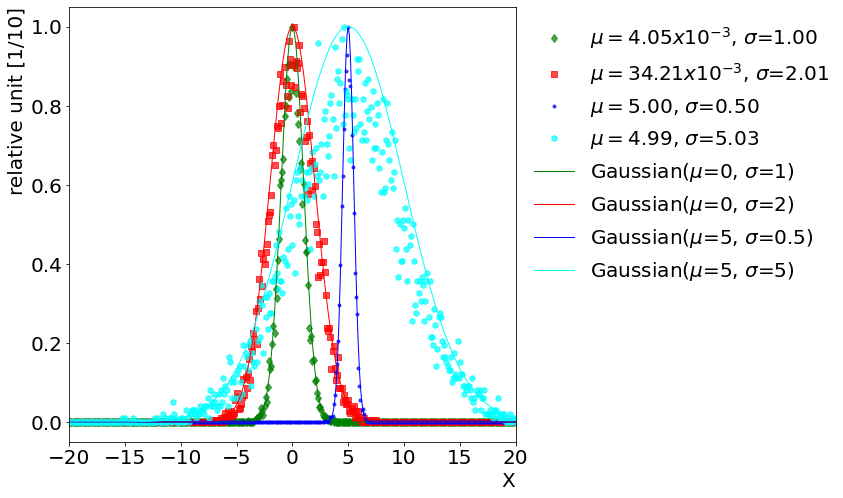

In [11]:
plt.figure(figsize=(8,8)) # plotsize

print("total data points for each case: {} ".format(len(gaussian_0_1_samples)))

mean_01 = np.mean(gaussian_0_1_samples)*1000
std_01 = np.std(gaussian_0_1_samples)

mean_02 = np.mean(gaussian_0_2_samples)*1000
std_02 = np.std(gaussian_0_2_samples)

mean_505 = np.mean(gaussian_5_05_samples)
std_505 = np.std(gaussian_5_05_samples)

mean_55 = np.mean(gaussian_5_5_samples)
std_55 = np.std(gaussian_5_5_samples)

bin_size = np.linspace(-40,40,801)

hist_0_1, bins_0_1 = np.histogram(gaussian_0_1_samples, bins=bin_size)
plt.step(bins_0_1[:-1], hist_0_1.astype(np.float32)/np.max(hist_0_1),"d",color = "green", where='mid',linewidth=3, alpha=0.7,label="$\mu={%.2f}x10^{%s}$, $\sigma$=%.2f" % (mean_01,"-3",std_01))
          
hist_0_2, bins_0_2 = np.histogram(gaussian_0_2_samples, bins=bin_size)
plt.step(bins_0_2[:-1], hist_0_2.astype(np.float32)/np.max(hist_0_2),"s",color = "red", where='mid',linewidth=3, alpha=0.7,label="$\mu={%.2f}x10^{%s}$, $\sigma$=%.2f" % (mean_02,"-3",std_02))

hist_5_05, bins_5_05 = np.histogram(gaussian_5_05_samples, bins=bin_size)
plt.step(bins_5_05[:-1], hist_5_05.astype(np.float32)/np.max(hist_5_05),".",color = "blue", where='mid',linewidth=3, alpha=0.7,label="$\mu={%.2f}$, $\sigma$=%.2f" % (mean_505,std_505))

hist_5_5, bins_5_5 = np.histogram(gaussian_5_5_samples, bins=bin_size)
plt.step(bins_5_5[:-1], hist_5_5.astype(np.float32)/np.max(hist_5_5),"h",color = "cyan", where='mid',linewidth=3, alpha=0.7,label="$\mu={%.2f}$, $\sigma$=%.2f" % (mean_55,std_55))

plt.plot(bin_size,Gaussian(bin_size,0,1)/Gaussian(0,0,1), color = "green", linestyle="-",linewidth=1, alpha=1,label="Gaussian($\mu$=0, $\sigma$=1)")
plt.plot(bin_size,Gaussian(bin_size,0,2)/Gaussian(0,0,2), color = "red", linestyle="-",linewidth=1, alpha=1,label="Gaussian($\mu$=0, $\sigma$=2)")
plt.plot(bin_size,Gaussian(bin_size,5,0.5)/Gaussian(5,5,0.5), color = "blue", linestyle="-",linewidth=1, alpha=1,label="Gaussian($\mu$=5, $\sigma$=0.5)")
plt.plot(bin_size,Gaussian(bin_size,5,5)/Gaussian(5,5,5), color = "cyan", linestyle="-",linewidth=1, alpha=1,label="Gaussian($\mu$=5, $\sigma$=5)")




# plt.text(-4, 450 , "$\mu=<X>$", fontsize=20)



# plt.legend(loc="best",ncol=1,fontsize=20,frameon=False)# plot label tag
plt.legend(bbox_to_anchor=(1, 0, 0, 1),ncol=1,fontsize=20,frameon=False)# plot label tag
# plt.yscale('log') 
# plt.xscale('log') 
plt.xlabel("X" , fontsize=20, horizontalalignment='right',x=1)  # plot x-axis label
plt.ylabel("relative unit [1/10]", fontsize=20, horizontalalignment='right',y=1)  # plot y-axis label
plt.xticks(fontsize=20)   # set x-ticks size
plt.yticks(fontsize=20)   # set y-ticks size 
plt.xlim((-20,20))
# plt.ylim((0,600))
# plt.savefig("./gaussian_0_1.pdf")  #save figure as pdf
plt.show()

# Poisson Distribution

Probability mass function: 

## $$p(x|\mu,\sigma) = exp[-\mu]\frac{\mu^x}{x!}\text{ for }x\geq0$$


Note that the PMF is the discrete counterpart of the continuous PDF! See this link for more details: https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.poisson.html

In [52]:
import random
import math
import matplotlib.pyplot as plt
import matplotlib.axes as axes
import numpy as np
from scipy.stats import poisson
from scipy.stats import norm
from statistics import median

We first plot several Poisson distributions for various $\mu$ and $\sigma$ values, by plotting their values at 10,000 different points and interpolating.

In [56]:
def plot_func(func, x=np.linspace(0,5,3001), logscalex=False, logscaley=False, ylim=[], xlabel='', ylabel=''):
    y = np.vectorize(func)(x)
    axes = plt.gca()
    if logscalex: axes.set_xscale('log')
    if logscaley: axes.set_yscale('log')
    if len(ylim) == 2: axes.set_ylim(ylim)
    if xlabel: axes.set_xlabel(xlabel)
    if ylabel: axes.set_ylabel(ylabel)
    plt.title(func.__name__)
    plt.plot(x,y)
    plt.show
    
# The key function here is np.vectorize, which takes a function and enables it to take 
# multiple inputs at a time (it's essentially a wrapper for a for loop). If you're not
# as lazy as me, you could write this out yourself!

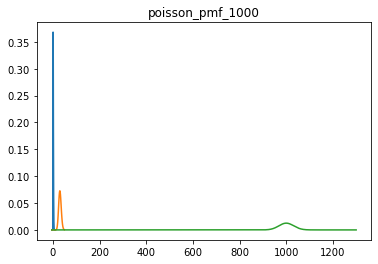

In [60]:
# Here, the key function here is poisson.pmf, which is simply the pmf shown above. 

def poisson_pmf_1(x):
    return poisson.pmf(x,mu=1)
plot_func(poisson_pmf_1,x=np.arange(-5,10,1))

def poisson_pmf_30(x):
    return poisson.pmf(x,mu=30)
plot_func(poisson_pmf_30,x=np.arange(-5,50,1))

def poisson_pmf_1000(x):
    return poisson.pmf(x,mu=1000)
plot_func(poisson_pmf_1000,x=np.arange(-5,1300,1))

# Now that you've seen some distributions, try plotting them individually and seeing how
# they change as you vary mu!

# Note that the pmf function does not like non-integer values! Can you get a higher 
# resolution by increasing the median mu?

# Try a negative mu, and note also that the poisson distribution does not like negative 
# values! Can you explain why? What does the poisson distribution represent?

# Binomial Distribution

Probability mass function: 

## $$p(x| N) = \frac{N!}{x!(N-x)!}\frac{1}{2^N}\,\,\,, x\in \text{N}$$



In [243]:
import matplotlib.pyplot as plt
from matplotlib.ticker import MaxNLocator
from matplotlib.colors import ListedColormap, LinearSegmentedColormap, BoundaryNorm
from matplotlib.collections import LineCollection
from matplotlib import cm

import random
import numpy as np


In [244]:
def Binomial(x,N):
    binomial = np.math.factorial(N)/(np.math.factorial(x)*np.math.factorial(N-x))/2**N
    return binomial

#### In this excerise, we will take tossing a coin for example.
#### We can assign a number for head and tail. Head is 1 and tail is 0.
#### If this coin is fair, the probability we get head is p = 0.5 and the probability for tail is q = 1 - p.
#### Now, we can toss a coin once and say this is 1 trial. If we want know the probability for getting head, we need to do many trials and take average.

#### Now, if we say that toss a coin 100 times and treat it to be 1 trial. If we want know the probability for getting 50 heads or getting 50, we still need to do many trials, said 1000 trials, and take average.



In [254]:
p = 0.5 
q = 1 - p
number_of_trial = 1000

In [255]:
N = [1, 10, 100, 1000]
binomial_N_1, binomial_N_10, binomial_N_100, binomial_N_1000 = [], [], [], []
binomial_list = [binomial_N_1, binomial_N_10, binomial_N_100, binomial_N_1000]

for i in range(number_of_trial):
    for j, element in enumerate(binomial_list):
        a = 0
        for k in range(N[j]):
            if random.random() >= p: # random.random() -> Random float:  0.0 <= x < 1.0
                a += 1   # If random number is greater than p, we get head and then +1
            elif random.random() < p:
                a += 0   # If random number is smaller than p, we get tails and then +0
            
        element.append(a)
    

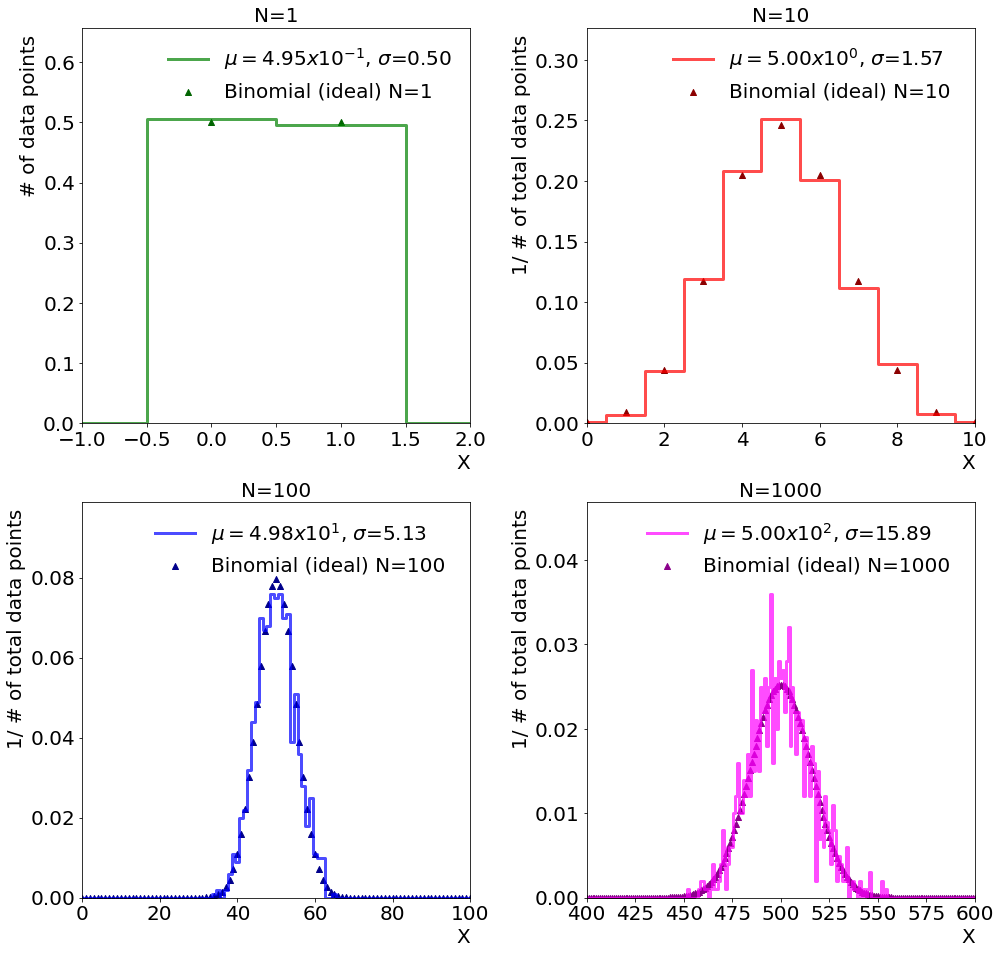

In [253]:
plt.figure(figsize=(16,16)) # plotsize

mean_1 = np.mean(binomial_N_1)*10
std_1 = np.std(binomial_N_1)

mean_10 = np.mean(binomial_N_10)*1
std_10 = np.std(binomial_N_10)

mean_100 = np.mean(binomial_N_100)*0.1
std_100 = np.std(binomial_N_100)

mean_1000 = np.mean(binomial_N_1000)*0.01
std_1000 = np.std(binomial_N_1000)

bin_size = np.linspace(-1,10000,10002)


plt.subplot(2, 2, 1)
hist_1, bins_1 = np.histogram(binomial_N_1, bins=bin_size)
plt.step(bins_1[:-1], hist_1.astype(np.float32)/hist_1.sum(),color = "green", where='mid',linewidth=3, alpha=0.7,label="$\mu={%.2f}x10^{%s}$, $\sigma$=%.2f" % (mean_1,"-1",std_1))
x = np.linspace(0,1,2)
binomial = []
for i in x:
    binomial.append(Binomial(i,1))
plt.scatter(x,binomial, color = "darkgreen", marker="^",linewidth=1, alpha=1,label="Binomial (ideal) N=1 ")


plt.legend(loc="best",ncol=1,fontsize=20,frameon=False)
plt.xlabel("X" , fontsize=20, horizontalalignment='right',x=1)  # plot x-axis label
plt.ylabel("# of data points ", fontsize=20, horizontalalignment='right',y=1)  # plot y-axis label
plt.xticks(fontsize=20)   # set x-ticks size
plt.yticks(fontsize=20)   # set y-ticks size 
plt.xlim((-1,2))
plt.ylim(0,max(hist_1)*1.3/hist_1.sum())
plt.title("N=1",fontsize=20)



plt.subplot(2, 2, 2)
hist_10, bins_10 = np.histogram(binomial_N_10, bins=bin_size)
plt.step(bins_10[:-1], hist_10.astype(np.float32)/hist_10.sum(),color = "red", where='mid',linewidth=3, alpha=0.7,label="$\mu={%.2f}x10^{%s}$, $\sigma$=%.2f" % (mean_10,"0",std_10))

x = np.linspace(0,10,11)
binomial = []
for i in x:
    binomial.append(Binomial(i,10))
plt.scatter(x,binomial, color = "darkred", marker="^",linewidth=1, alpha=1,label="Binomial (ideal) N=10 ")

plt.legend(loc="best",ncol=1,fontsize=20,frameon=False)
plt.xlabel("X" , fontsize=20, horizontalalignment='right',x=1)  # plot x-axis label
plt.ylabel("1/ # of total data points ", fontsize=20, horizontalalignment='right',y=1)  # plot y-axis label
plt.xticks(fontsize=20)   # set x-ticks size
plt.yticks(fontsize=20)   # set y-ticks size 
plt.xlim((0,10))
plt.ylim(0,max(hist_10)*1.3/hist_10.sum())
plt.title("N=10",fontsize=20)



plt.subplot(2, 2, 3)
hist_100, bins_100 = np.histogram(binomial_N_100, bins=bin_size)
plt.step(bins_100[:-1], hist_100.astype(np.float32)/hist_100.sum(),color = "blue", where='mid',linewidth=3, alpha=0.7,label="$\mu={%.2f}x10^{%s}$, $\sigma$=%.2f" % (mean_100,"1",std_100))

x = np.linspace(0,100,101)
binomial = []
for i in x:
    binomial.append(Binomial(i,100))
plt.scatter(x,binomial, color = "darkblue", marker="^",linewidth=1, alpha=1,label="Binomial (ideal) N=100 ")

plt.legend(loc="best",ncol=1,fontsize=20,frameon=False)
plt.xlabel("X" , fontsize=20, horizontalalignment='right',x=1)  # plot x-axis label
plt.ylabel("1/ # of total data points ", fontsize=20, horizontalalignment='right',y=1)  # plot y-axis label
plt.xticks(fontsize=20)   # set x-ticks size
plt.yticks(fontsize=20)   # set y-ticks size 
plt.xlim((0,100))
plt.ylim(0,max(hist_100)*1.3/hist_100.sum())
plt.title("N=100",fontsize=20)



plt.subplot(2, 2, 4)
bin_size = np.linspace(-1,1000,1002)
hist_1000, bins_1000 = np.histogram(binomial_N_1000, bins=bin_size)
plt.step(bins_1000[:-1], hist_1000.astype(np.float32)/hist_1000.sum(),color = "magenta", where='mid',linewidth=3, alpha=0.7,label="$\mu={%.2f}x10^{%s}$, $\sigma$=%.2f" % (mean_1000,"2",std_1000))

x = np.linspace(0,1000,1001)
binomial = []
for i in x:
    binomial.append(Binomial(i,1000))
plt.scatter(x,binomial, color = "darkmagenta", marker="^",linewidth=1, alpha=1,label="Binomial (ideal) N=1000 ")

plt.legend(loc="best",ncol=1,fontsize=20,frameon=False)
plt.xlabel("X" , fontsize=20, horizontalalignment='right',x=1)  # plot x-axis label
plt.ylabel("1/ # of total data points ", fontsize=20, horizontalalignment='right',y=1)  # plot y-axis label
plt.xticks(fontsize=20)   # set x-ticks size
plt.yticks(fontsize=20)   # set y-ticks size 
plt.xlim((400,600))
plt.ylim(0,max(hist_1000)*1.3/hist_1000.sum())
plt.title("N=1000",fontsize=20)

plt.subplots_adjust(wspace=0.3, hspace=0.2)
# plt.savefig("./binomial.pdf")  #save figure as pdf
plt.show()

# Further Excerise
### Please compare Binomial case with N=1000 and Poisson case with $\mu$=1000 to Gaussian with some $\mu$ and $\sigma$